# Modelos de Machine Learning - Trabalho Humberto
César Macieira

## Instalando e Carregando Pacotes

In [1]:
import bz2
import time
import pickle
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor

shatter_mod = shatter_mod.drop(columns=['Unnamed: 0'])
shatter_mod = shatter_mod.rename(columns={'Velocidade esteira (m/min)': 'Velocidade_esteira', '>6,30mm': 'maior6.30mm', 
                                          '% Umidade mistura 1': 'Umidade_mistura', '<0,106mm': 'menor0.106mm'})

## Construindo os modelos

In [2]:
from pycaret.regression import *

In [3]:
var_exp = ['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']
var_exp_SA = ['Idade1','EstadoCivil_1','EstadoCivil_2','EstadoCivil_3','EstadoCivil_4','EstadoCivil_5','EstadoCivil_6','Sexo_F',
            'Num_Membros_Familia1','Energia_Eletrica1','Situacao_Moradia_ALUGADO','Situacao_Moradia_ARRENDADO','Situacao_Moradia_CEDIDO',
            'Situacao_Moradia_FINANCIADO','Situacao_Moradia_OCUPACAO','Situacao_Moradia_OUTRA','Situacao_Moradia_PROPRIO',
            'Situacao_Moradia_SITUACAO_DE_RUA','Abastecimento_Agua_CISTERNA','Abastecimento_Agua_OUTRO','Consumo_Agua_CLORADA',
            'Consumo_Agua_FERVIDA','Consumo_Agua_FILTRADA','Consumo_Agua_SEM_TRATAMENTO','Destino_Lixo_CEU_ABERTO',
            'Destino_Lixo_COLETADO','Destino_Lixo_OUTRO','Destino_Lixo_QUEIMADO_ENTERRADO','Numero_Comodos1',
            'QtdAtendimentosMedicos','Regional_Atendimento_BARREIRO','Regional_Atendimento_CENTRO_SUL','Regional_Atendimento_LESTE',
            'Regional_Atendimento_NORDESTE','Regional_Atendimento_NOROESTE','Regional_Atendimento_NORTE','Regional_Atendimento_OESTE',
            'Regional_Atendimento_PAMPULHA','Regional_Atendimento_VENDA_NOVA']

## QtdCID

In [4]:
%%time
treino_QtdCID = pd.read_excel('treino QtdCid.xlsx')
teste_QtdCID = pd.read_excel('teste QtdCid.xlsx')
dados_QtdCID = pd.concat([treino_QtdCID, teste_QtdCID], ignore_index = True)

CPU times: total: 50.5 s
Wall time: 52.8 s


### Com atendimentos

In [5]:
x_treino_QtdCID, x_teste_QtdCID = treino_QtdCID[var_exp], teste_QtdCID[var_exp]
y_treino_QtdCID, y_teste_QtdCID = treino_QtdCID[['QtdCID']], teste_QtdCID[['QtdCID']]

In [6]:
%%time
modelos_pycaret_QtdCid = setup(data = dados_QtdCID, target='QtdCID', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 47)"
4,Transformed data shape,"(169203, 75)"
5,Transformed train set shape,"(126902, 75)"
6,Transformed test set shape,"(42301, 75)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.3044,3.6843,1.9194,0.6178,0.3222,0.3823,5.6990
xgboost,Extreme Gradient Boosting,1.3123,3.7762,1.9432,0.6083,0.3238,0.3822,1.2830
br,Bayesian Ridge,1.4053,3.9435,1.9858,0.5909,0.3444,0.4617,1.4360
rf,Random Forest Regressor,1.3987,4.1565,2.0387,0.5688,0.3434,0.4112,21.9390
ada,AdaBoost Regressor,1.5772,4.6209,2.1494,0.5205,0.3882,0.5794,5.1470


CPU times: total: 18.4 s
Wall time: 6min 13s


GradientBoostingRegressor(random_state=13)

In [7]:
%%time
modelo_QtdCID = create_model('gbr').fit(x_treino_QtdCID, y_treino_QtdCID)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3153,3.8319,1.9575,0.6177,0.3242,0.3790
1,1.3033,3.6105,1.9001,0.6205,0.3212,0.3826
2,1.2922,3.6466,1.9096,0.6253,0.3198,0.3783
3,1.3012,3.7015,1.9239,0.6198,0.3225,0.3852
4,1.3045,3.7408,1.9341,0.6164,0.3219,0.3799
5,1.3064,3.6284,1.9048,0.6104,0.3237,0.3858
6,1.3192,3.7573,1.9384,0.6083,0.3231,0.3841
7,1.3069,3.6919,1.9214,0.6202,0.3227,0.3839
8,1.2960,3.5983,1.8969,0.6193,0.3204,0.3822


CPU times: total: 22.6 s
Wall time: 1min 20s


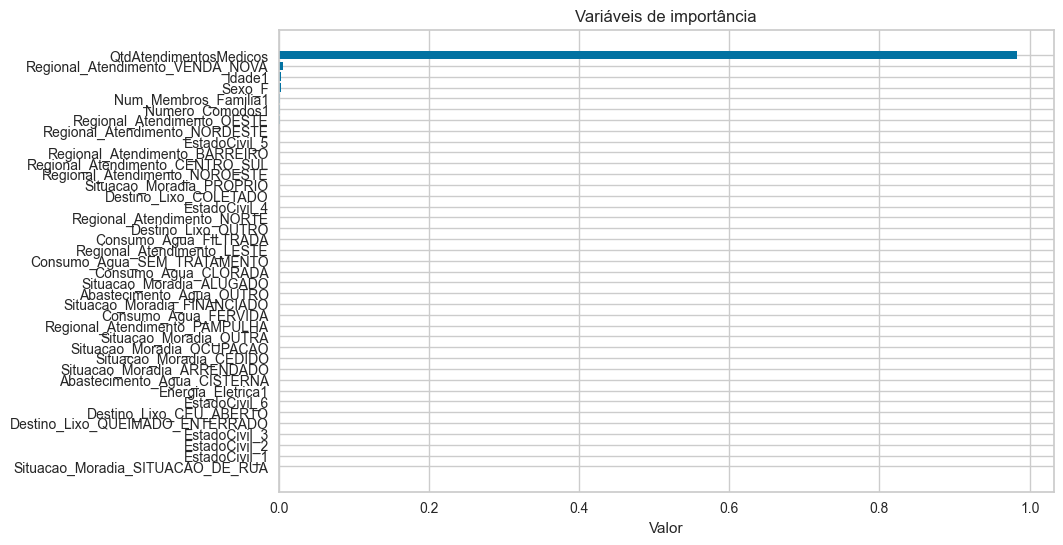

In [8]:
importance_features = modelo_QtdCID.feature_importances_
nomes_features = x_treino_QtdCID.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [9]:
x_treino_QtdCID2, x_teste_QtdCID2 = treino_QtdCID[var_exp_SA], teste_QtdCID[var_exp_SA]

In [10]:
%%time
modelos_pycaret_QtdCid2 = setup(data = dados_QtdCID.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdCID', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdCID
2,Target type,Regression
3,Original data shape,"(169203, 46)"
4,Transformed data shape,"(169203, 74)"
5,Transformed train set shape,"(126902, 74)"
6,Transformed test set shape,"(42301, 74)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3187,9.3002,3.0495,0.0354,0.5695,0.9461,5.4810
xgboost,Extreme Gradient Boosting,2.3304,9.4029,3.0663,0.0248,0.5721,0.9472,1.1730
br,Bayesian Ridge,2.3423,9.4335,3.0713,0.0216,0.5749,0.9615,1.3830
ada,AdaBoost Regressor,2.7206,10.9816,3.3115,-0.1390,0.6574,1.3055,3.1810
rf,Random Forest Regressor,2.5585,11.3917,3.3750,-0.1815,0.6219,1.0231,20.6780


CPU times: total: 18.2 s
Wall time: 5min 37s


GradientBoostingRegressor(random_state=13)

In [11]:
%%time
modelo_QtdCID2 = create_model('gbr').fit(x_treino_QtdCID2, y_treino_QtdCID)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3473,9.6800,3.1113,0.0343,0.5731,0.9474
1,2.3093,9.1865,3.0309,0.0345,0.5654,0.9331
2,2.3366,9.4128,3.0680,0.0327,0.5747,0.9695
3,2.3114,9.3635,3.0600,0.0383,0.5693,0.9482
4,2.3078,9.4064,3.0670,0.0355,0.5672,0.9408
5,2.3005,8.9631,2.9938,0.0375,0.5683,0.9500
6,2.3177,9.2482,3.0411,0.0358,0.5682,0.9418
7,2.3291,9.3334,3.0551,0.0398,0.5729,0.9546
8,2.3124,9.1350,3.0224,0.0336,0.5697,0.9456


CPU times: total: 22.2 s
Wall time: 1min 17s


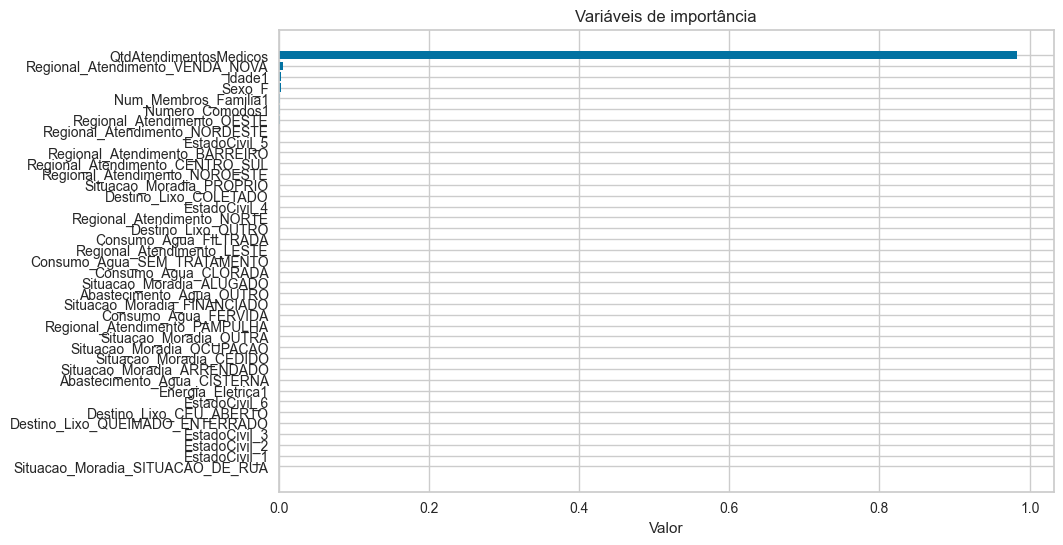

In [12]:
importance_features = modelo_QtdCID2.feature_importances_
nomes_features = x_treino_QtdCID2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## QtdMedicamentos

In [13]:
%%time
treino_QtdMedicamentos = pd.read_excel('treino QtdMedicamentos.xlsx')
teste_QtdMedicamentos = pd.read_excel('teste QtdMedicamentos.xlsx')
dados_QtdMedicamentos = pd.concat([treino_QtdMedicamentos, teste_QtdMedicamentos], ignore_index = True)

CPU times: total: 53 s
Wall time: 56.3 s


### Com atendimentos

In [14]:
x_treino_QtdMedicamentos, x_teste_QtdMedicamentos = treino_QtdMedicamentos[var_exp], teste_QtdMedicamentos[var_exp]
y_treino_QtdMedicamentos, y_teste_QtdMedicamentos = treino_QtdMedicamentos[['QtdMedicamentos']], teste_QtdMedicamentos[['QtdMedicamentos']]

In [15]:
%%time
modelos_pycaret_QtdMedicamentos = setup(data = dados_QtdMedicamentos, target='QtdMedicamentos', normalize = False, train_size = 0.75, fold = 10, 
                                        session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 47)"
4,Transformed data shape,"(169203, 75)"
5,Transformed train set shape,"(126902, 75)"
6,Transformed test set shape,"(42301, 75)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9454,1.7286,1.3147,0.4025,0.5019,0.5205,5.7400
xgboost,Extreme Gradient Boosting,0.9505,1.7631,1.3278,0.3906,0.5041,0.5259,1.1960
br,Bayesian Ridge,0.9858,1.8238,1.3504,0.3696,0.5139,0.4883,1.3700
rf,Random Forest Regressor,1.0031,1.9630,1.4010,0.3215,0.5353,0.5738,21.1920
ada,AdaBoost Regressor,1.1304,2.1077,1.4511,0.2711,0.5914,0.6324,4.2110


CPU times: total: 18.7 s
Wall time: 5min 56s


GradientBoostingRegressor(random_state=13)

In [16]:
%%time
modelo_QtdMedicamentos = create_model('gbr').fit(x_treino_QtdMedicamentos, y_treino_QtdMedicamentos)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9474,1.7440,1.3206,0.4037,0.4990,0.5187
1,0.9573,1.7633,1.3279,0.3894,0.5089,0.5197
2,0.9359,1.7136,1.3090,0.4049,0.5007,0.5204
3,0.9355,1.6923,1.3009,0.4131,0.5008,0.5142
4,0.9511,1.7508,1.3232,0.4068,0.5037,0.5170
5,0.9513,1.7488,1.3224,0.3939,0.5035,0.5264
6,0.9481,1.7491,1.3225,0.3895,0.5006,0.5245
7,0.9352,1.6878,1.2992,0.4136,0.4987,0.5218
8,0.9476,1.7329,1.3164,0.4083,0.4998,0.5214


CPU times: total: 23.1 s
Wall time: 1min 20s


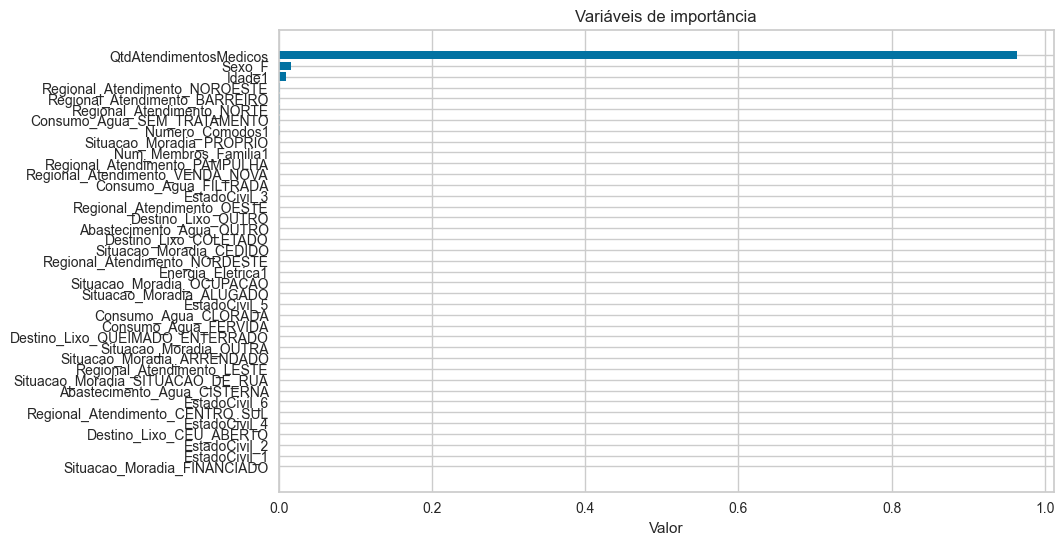

In [17]:
importance_features = modelo_QtdMedicamentos.feature_importances_
nomes_features = x_treino_QtdMedicamentos.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [18]:
x_treino_QtdMedicamentos2, x_teste_QtdMedicamentos2 = treino_QtdMedicamentos[var_exp_SA], teste_QtdMedicamentos[var_exp_SA]

In [19]:
%%time
modelos_pycaret_QtdMedicamentos2 = setup(data = dados_QtdMedicamentos.drop(['QtdAtendimentosMedicos'],axis = 1), target='QtdMedicamentos', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,QtdMedicamentos
2,Target type,Regression
3,Original data shape,"(169203, 46)"
4,Transformed data shape,"(169203, 74)"
5,Transformed train set shape,"(126902, 74)"
6,Transformed test set shape,"(42301, 74)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.2904,2.7691,1.6641,0.0429,0.6631,0.4507,6.1370
xgboost,Extreme Gradient Boosting,1.2939,2.7984,1.6728,0.0328,0.6656,0.4635,1.2130
br,Bayesian Ridge,1.3047,2.8066,1.6753,0.0299,0.6682,0.4520,1.6280
ada,AdaBoost Regressor,1.5206,3.2256,1.7954,-0.1150,0.7734,0.5838,3.5460
rf,Random Forest Regressor,1.4110,3.3996,1.8438,-0.1751,0.7245,0.5944,21.0610


CPU times: total: 18 s
Wall time: 5min 54s


GradientBoostingRegressor(random_state=13)

In [20]:
%%time
modelo_QtdMedicamentos2 = create_model('gbr').fit(x_treino_QtdMedicamentos2, y_treino_QtdMedicamentos)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2958,2.8020,1.6739,0.0419,0.6640,0.4489
1,1.2964,2.7701,1.6644,0.0408,0.6639,0.4531
2,1.2939,2.7670,1.6634,0.0390,0.6672,0.4525
3,1.2837,2.7475,1.6576,0.0471,0.6622,0.4460
4,1.2952,2.8092,1.6761,0.0483,0.6643,0.4476
5,1.2834,2.7578,1.6607,0.0443,0.6612,0.4471
6,1.2796,2.7394,1.6551,0.0438,0.6575,0.4499
7,1.2868,2.7530,1.6592,0.0435,0.6622,0.4545
8,1.2969,2.7983,1.6728,0.0446,0.6634,0.4526


CPU times: total: 21.7 s
Wall time: 1min 18s


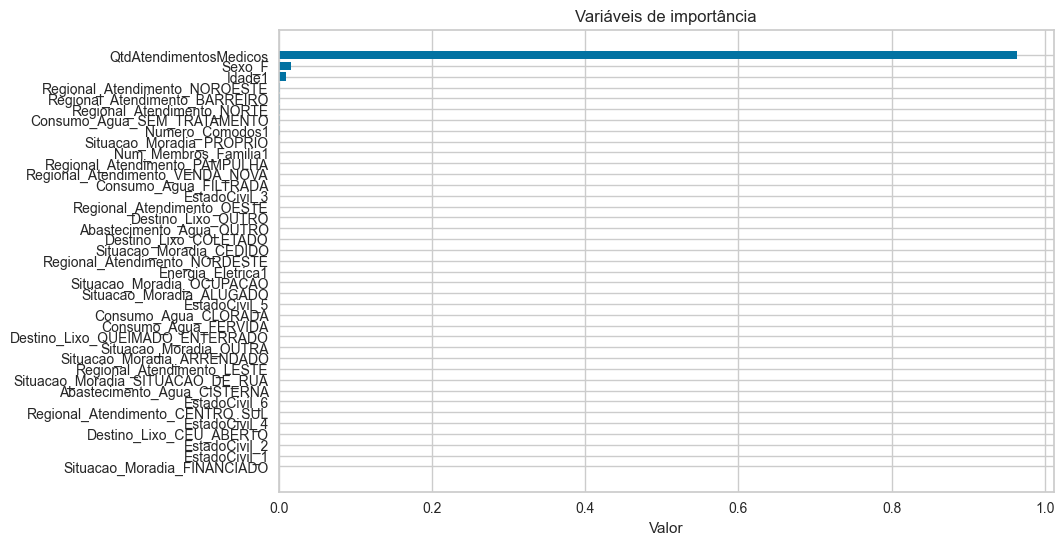

In [21]:
importance_features = modelo_QtdMedicamentos2.feature_importances_
nomes_features = x_treino_QtdMedicamentos2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTOS

In [22]:
%%time
treino_QtdENCAMINHAMENTOS = pd.read_excel('treino QtdENCAMINHAMENTOS.xlsx')
teste_QtdENCAMINHAMENTOS = pd.read_excel('teste QtdENCAMINHAMENTOS.xlsx')
dados_QtdENCAMINHAMENTOS = pd.concat([treino_QtdENCAMINHAMENTOS, teste_QtdENCAMINHAMENTOS], ignore_index = True)

CPU times: total: 3.41 s
Wall time: 3.71 s


### Com atendimentos

In [23]:
x_treino_QtdENCAMINHAMENTOS, x_teste_QtdENCAMINHAMENTOS = treino_QtdENCAMINHAMENTOS[var_exp], teste_QtdENCAMINHAMENTOS[var_exp]
y_treino_QtdENCAMINHAMENTOS = treino_QtdENCAMINHAMENTOS[['Qtd_ENCAMINHAMENTOS']]
y_teste_QtdENCAMINHAMENTOS = teste_QtdENCAMINHAMENTOS[['Qtd_ENCAMINHAMENTOS']]

In [24]:
%%time
modelos_pycaret_QtdENCAMINHAMENTOS = setup(data = dados_QtdENCAMINHAMENTOS, target='Qtd_ENCAMINHAMENTOS', normalize = False, train_size = 0.75, 
                                           fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTOS
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2705,0.2625,0.5019,0.0613,0.1679,0.1904,0.2820
br,Bayesian Ridge,0.2731,0.2675,0.5042,0.0600,0.1684,0.1943,0.0740
ada,AdaBoost Regressor,0.3217,0.2899,0.5213,0.0045,0.1790,0.2477,0.1040
rf,Random Forest Regressor,0.2894,0.2847,0.5241,-0.0312,0.1798,0.2124,0.6760
xgboost,Extreme Gradient Boosting,0.2876,0.2995,0.5397,-0.1043,0.1854,0.2072,0.1120


CPU times: total: 3 s
Wall time: 15.9 s


GradientBoostingRegressor(random_state=13)

In [25]:
%%time
modelo_QtdENCAMINHAMENTOS = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTOS, y_treino_QtdENCAMINHAMENTOS)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3019,0.6183,0.7863,0.2200,0.1820,0.1920
1,0.2823,0.2500,0.5000,0.0432,0.1759,0.1930
2,0.2616,0.1962,0.4429,0.0484,0.1631,0.1864
3,0.2799,0.2607,0.5106,0.0186,0.1771,0.1958
4,0.2547,0.1784,0.4224,-0.0061,0.1564,0.1927
5,0.2917,0.3087,0.5556,0.0861,0.1827,0.1922
6,0.2646,0.2149,0.4636,0.0482,0.1635,0.1916
7,0.2595,0.2206,0.4696,0.0400,0.1647,0.1848
8,0.2523,0.1933,0.4397,0.0251,0.1555,0.1911


CPU times: total: 1.41 s
Wall time: 4.53 s


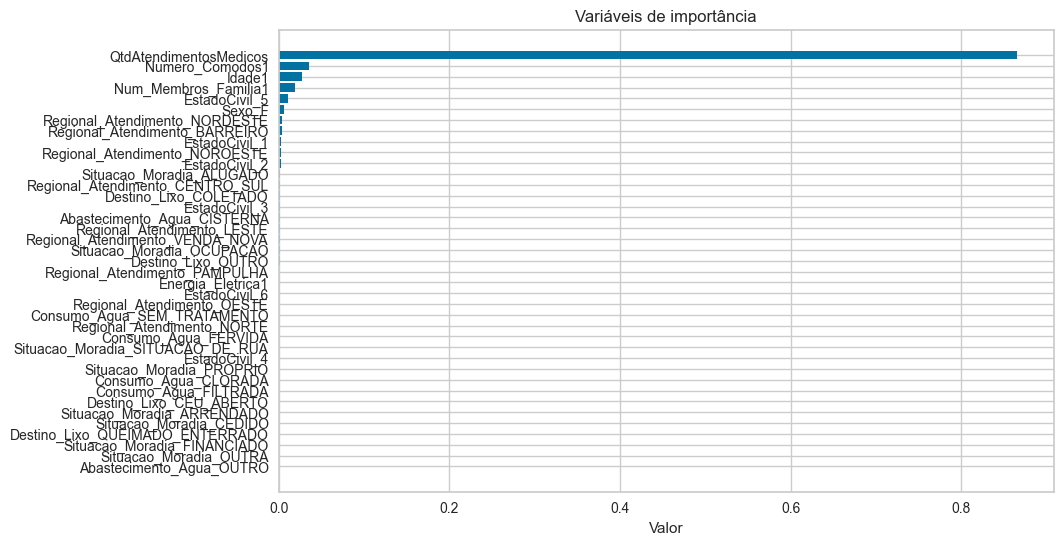

In [26]:
importance_features = modelo_QtdENCAMINHAMENTOS.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTOS.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [27]:
x_treino_QtdENCAMINHAMENTOS2, x_teste_QtdENCAMINHAMENTOS2 = treino_QtdENCAMINHAMENTOS[var_exp_SA], teste_QtdENCAMINHAMENTOS[var_exp_SA]

In [28]:
%%time
modelos_pycaret_QtdENCAMINHAMENTOS2 = setup(data = dados_QtdENCAMINHAMENTOS.drop(['QtdAtendimentosMedicos'],axis = 1), target='Qtd_ENCAMINHAMENTOS', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTOS
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2911,0.2898,0.5223,-0.0004,0.1729,0.2053,0.0720
gbr,Gradient Boosting Regressor,0.2905,0.2936,0.5260,-0.0154,0.1747,0.2050,0.2780
ada,AdaBoost Regressor,0.3655,0.3670,0.5781,-0.3469,0.1910,0.2868,0.1330
rf,Random Forest Regressor,0.3195,0.3602,0.5876,-0.3177,0.1966,0.2365,0.6280
xgboost,Extreme Gradient Boosting,0.3096,0.3678,0.5930,-0.3573,0.1955,0.2247,0.1240


CPU times: total: 2.09 s
Wall time: 14.8 s


BayesianRidge()

In [31]:
%%time
modelo_QtdENCAMINHAMENTOS2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTOS2, y_treino_QtdENCAMINHAMENTOS)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3284,0.7976,0.8931,-0.0062,0.2005,0.2076
1,0.3014,0.2629,0.5127,-0.0063,0.1808,0.2069
2,0.2851,0.2081,0.4562,-0.0095,0.1685,0.2056
3,0.2959,0.2726,0.5221,-0.0260,0.1814,0.2068
4,0.2702,0.1856,0.4308,-0.0464,0.1591,0.2044
5,0.3140,0.3475,0.5895,-0.0290,0.1941,0.2078
6,0.2797,0.2283,0.4778,-0.0112,0.1687,0.2025
7,0.2825,0.2312,0.4808,-0.0062,0.1702,0.2033
8,0.2668,0.1994,0.4466,-0.0059,0.1572,0.2021


CPU times: total: 1.2 s
Wall time: 4.03 s


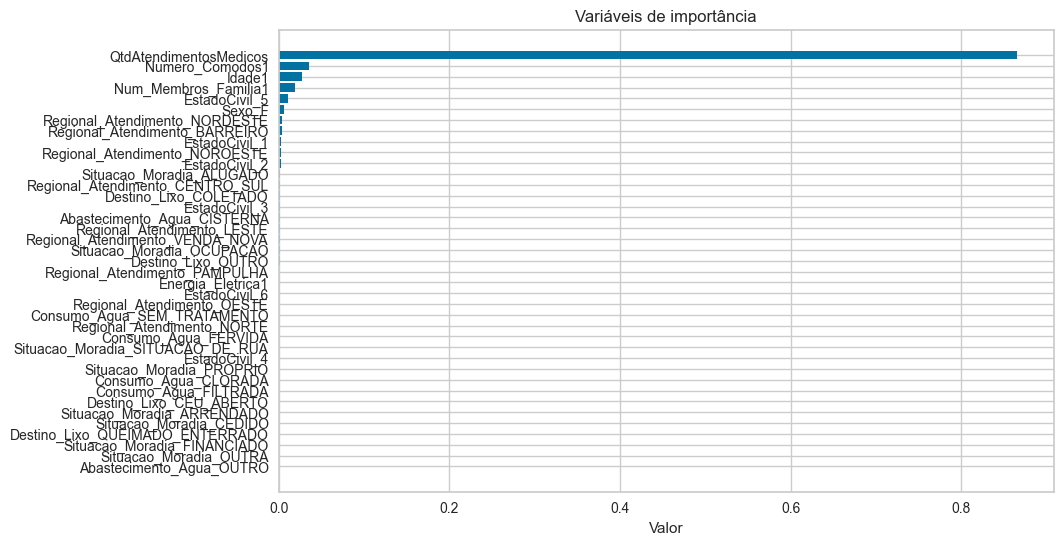

In [32]:
importance_features = modelo_QtdENCAMINHAMENTOS2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTOS2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE

In [33]:
%%time
treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.read_excel('treino QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.xlsx')
teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.read_excel('teste QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.xlsx')
dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = pd.concat([treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                                                        teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE], ignore_index = True)

CPU times: total: 3.02 s
Wall time: 3.66 s


### Com atendimentos

In [34]:
x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp]
x_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp]
y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[['Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE']]
y_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[['Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE']]

In [35]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = setup(data = dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                        target='Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0326,0.0195,0.1360,0.0058,0.0873,0.9715,0.0710
gbr,Gradient Boosting Regressor,0.0313,0.0196,0.1367,-0.0072,0.0886,0.9567,0.2870
rf,Random Forest Regressor,0.0361,0.0223,0.1463,-0.1730,0.0997,0.9422,0.4110
xgboost,Extreme Gradient Boosting,0.0438,0.0241,0.1530,-0.3190,0.1029,0.9405,0.1100
ada,AdaBoost Regressor,0.1107,0.0336,0.1816,-0.9943,0.1361,0.8623,0.1130


CPU times: total: 1.52 s
Wall time: 12.4 s


BayesianRidge()

In [36]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE, 
                                                                      y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0319,0.0189,0.1375,-0.0209,0.0920,0.9650
1,0.0225,0.0066,0.0815,0.0494,0.0587,0.8899
2,0.0264,0.0116,0.1077,-0.1092,0.0769,0.9779
3,0.0410,0.0310,0.1760,-0.0000,0.1151,0.9724
4,0.0289,0.0185,0.1361,-0.0607,0.0847,0.9497
5,0.0315,0.0304,0.1744,0.0314,0.0959,0.9777
6,0.0339,0.0168,0.1295,-0.0372,0.0915,0.9726
7,0.0326,0.0225,0.1499,-0.0212,0.0962,0.9809
8,0.0268,0.0104,0.1019,0.0083,0.0720,0.9479


CPU times: total: 1.39 s
Wall time: 4.39 s


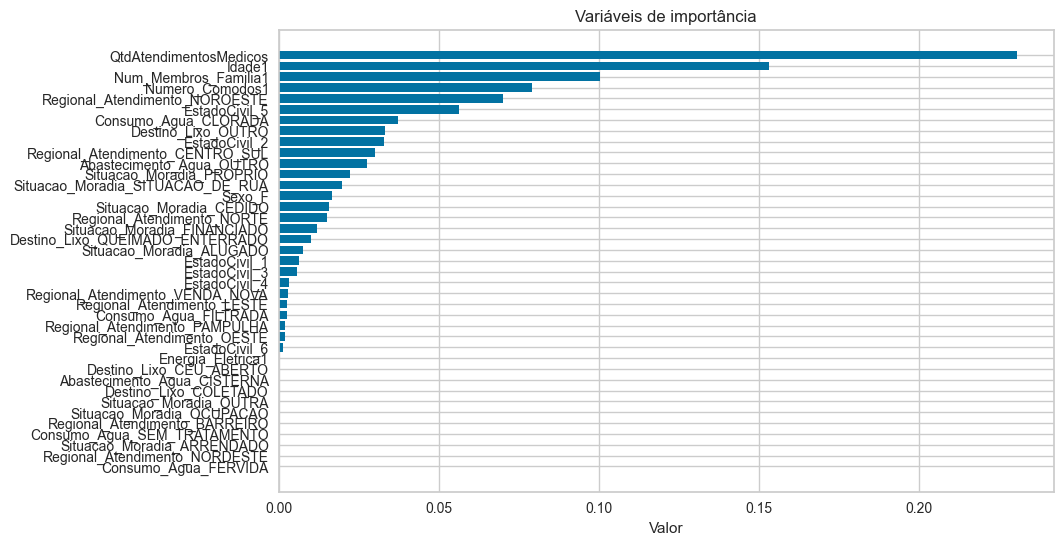

In [37]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [38]:
x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp_SA]
x_teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = teste_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE[var_exp_SA]

In [39]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = setup(data = dados_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE.drop(['QtdAtendimentosMedicos'],axis = 1), 
                                                              target='Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_ESPECIALIDADE
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0317,0.0196,0.1362,0.0028,0.0874,0.9753,0.0690
gbr,Gradient Boosting Regressor,0.0315,0.0200,0.1379,-0.0239,0.0893,0.9689,0.2650
rf,Random Forest Regressor,0.0380,0.0255,0.1574,-0.3862,0.1081,0.9633,0.3740
xgboost,Extreme Gradient Boosting,0.0438,0.0260,0.1591,-0.4360,0.1067,0.9784,0.1070
ada,AdaBoost Regressor,0.0713,0.0282,0.1615,-0.4214,0.1128,0.9207,0.0910


CPU times: total: 2.12 s
Wall time: 11.6 s


BayesianRidge()

In [40]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2, 
                                                                       y_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0333,0.0195,0.1396,-0.0527,0.0937,0.9788
1,0.0228,0.0071,0.0842,-0.0128,0.0600,0.9497
2,0.0275,0.0118,0.1088,-0.1327,0.0778,0.9777
3,0.0412,0.0308,0.1756,0.0042,0.1147,0.9617
4,0.0285,0.0176,0.1328,-0.0100,0.0836,0.9755
5,0.0320,0.0317,0.1779,-0.0079,0.0988,0.9786
6,0.0334,0.0171,0.1308,-0.0575,0.0921,0.9695
7,0.0323,0.0222,0.1490,-0.0090,0.0958,0.9829
8,0.0269,0.0101,0.1007,0.0309,0.0708,0.9427


CPU times: total: 1.22 s
Wall time: 4.12 s


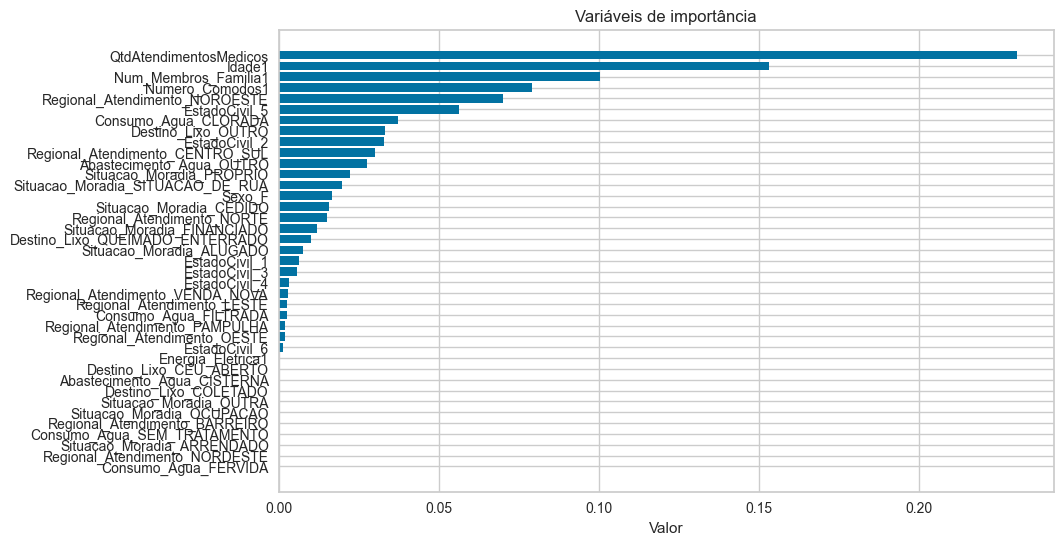

In [41]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_ESPECIALIDADE2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

## Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL

In [42]:
%%time
treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.read_excel('treino QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.xlsx')
teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.read_excel('teste QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.xlsx')
dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = pd.concat([treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                                                        teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL], ignore_index = True)

CPU times: total: 3.2 s
Wall time: 3.5 s


### Com atendimentos

In [43]:
x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp]
x_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp]
y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[['Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL']]
y_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[['Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL']]

In [44]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = setup(data = dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                        target='Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL', normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL
2,Target type,Regression
3,Original data shape,"(11353, 47)"
4,Transformed data shape,"(11353, 74)"
5,Transformed train set shape,"(8514, 74)"
6,Transformed test set shape,"(2839, 74)"
7,Ordinal features,1
8,Numeric features,39
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0068,0.0034,0.0559,-0.0001,0.0380,0.9944,0.0660
gbr,Gradient Boosting Regressor,0.0073,0.0035,0.0570,-0.0485,0.0392,0.9943,0.2610
rf,Random Forest Regressor,0.0084,0.0042,0.0633,-0.3673,0.0460,0.9875,0.2480
xgboost,Extreme Gradient Boosting,0.0129,0.0050,0.0695,-0.7561,0.0506,0.9858,0.1210
ada,AdaBoost Regressor,0.2822,0.1222,0.3388,-53.9733,0.2775,0.6663,0.2730


CPU times: total: 2.14 s
Wall time: 12.3 s


BayesianRidge()

In [45]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL, 
                                                                      y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0071,0.0028,0.0529,-0.1964,0.0378,0.9961
1,0.0084,0.0037,0.0609,-0.0565,0.0430,0.9918
2,0.0061,0.0024,0.0489,-0.0218,0.0342,0.9999
3,0.0086,0.0070,0.0837,0.0011,0.0502,0.9980
4,0.0051,0.0012,0.0350,-0.0450,0.0249,0.9922
5,0.0102,0.0071,0.0841,-0.0103,0.0585,0.9977
6,0.0070,0.0025,0.0495,-0.0450,0.0350,0.9891
7,0.0056,0.0013,0.0359,-0.0993,0.0257,1.0033
8,0.0078,0.0036,0.0604,-0.0376,0.0424,0.9962


CPU times: total: 1.58 s
Wall time: 4.53 s


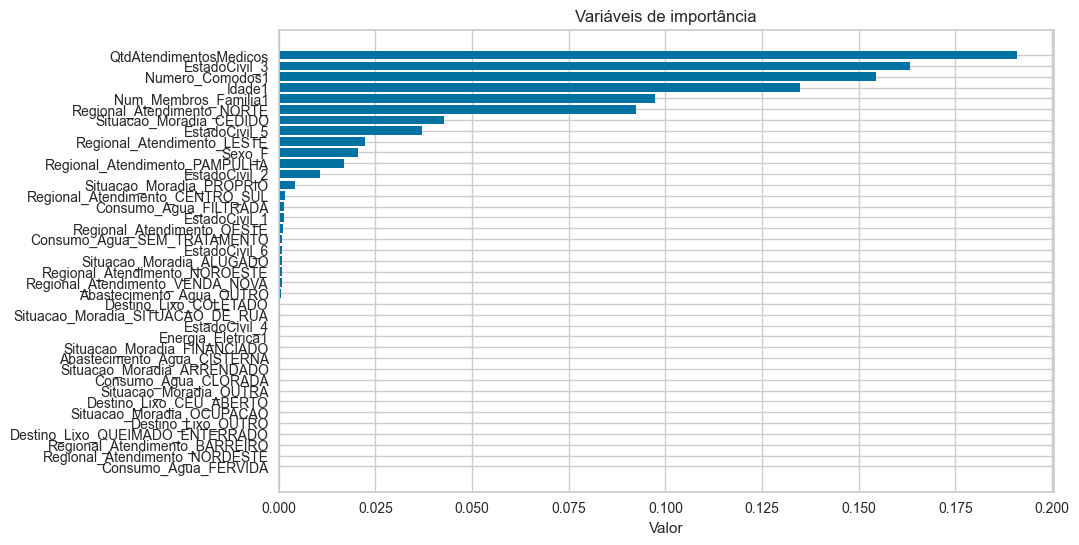

In [46]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()

### Sem atendimentos

In [47]:
x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp_SA]
x_teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = teste_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL[var_exp_SA]

In [48]:
%%time
modelos_pycaret_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = setup(data = dados_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL.drop(['QtdAtendimentosMedicos'],axis = 1), 
                                                              target='Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL', 
                                normalize = False, train_size = 0.75, fold = 10, session_id=13)
#compare_models(include=['rf', 'lightgbm', 'lr', 'ridge', 'lar', 'omp', 'br', 'knn', 'ada', 'gbr', 'en', 'et', 'lasso', 'llar', 'dummy', 'huber', 'dt', 
#                        'par', 'xgboost'], sort='MAPE')
compare_models(include=['rf', 'br', 'gbr', 'xgboost', 'ada'], sort='RMSE')

,Description,Value
0,Session id,13
1,Target,Qtd_ENCAMINHAMENTO_PARA_SAUDE_MENTAL
2,Target type,Regression
3,Original data shape,"(11353, 46)"
4,Transformed data shape,"(11353, 73)"
5,Transformed train set shape,"(8514, 73)"
6,Transformed test set shape,"(2839, 73)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0067,0.0034,0.0559,-0.0009,0.0380,0.9953,0.0710
gbr,Gradient Boosting Regressor,0.0071,0.0035,0.0566,-0.0320,0.0389,0.9966,0.2710
rf,Random Forest Regressor,0.0084,0.0046,0.0662,-0.4786,0.0484,0.9983,0.2450
xgboost,Extreme Gradient Boosting,0.0123,0.0050,0.0688,-0.6255,0.0502,1.0010,0.1150
ada,AdaBoost Regressor,0.2898,0.1292,0.3481,-56.9309,0.2842,0.6768,0.2610


CPU times: total: 2.14 s
Wall time: 12.2 s


BayesianRidge()

In [49]:
%%time
modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2 = create_model('gbr').fit(x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2, 
                                                                       y_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0069,0.0025,0.0500,-0.0658,0.0355,0.9968
1,0.0074,0.0035,0.0593,-0.0015,0.0412,0.9912
2,0.0062,0.0024,0.0490,-0.0248,0.0342,1.0013
3,0.0085,0.0070,0.0839,-0.0030,0.0505,0.9983
4,0.0052,0.0012,0.0351,-0.0499,0.0250,0.9954
5,0.0101,0.0071,0.0840,-0.0087,0.0584,0.9969
6,0.0065,0.0024,0.0490,-0.0260,0.0345,0.9919
7,0.0051,0.0012,0.0353,-0.0632,0.0249,1.0033
8,0.0083,0.0038,0.0614,-0.0732,0.0436,0.9975


CPU times: total: 875 ms
Wall time: 4.48 s


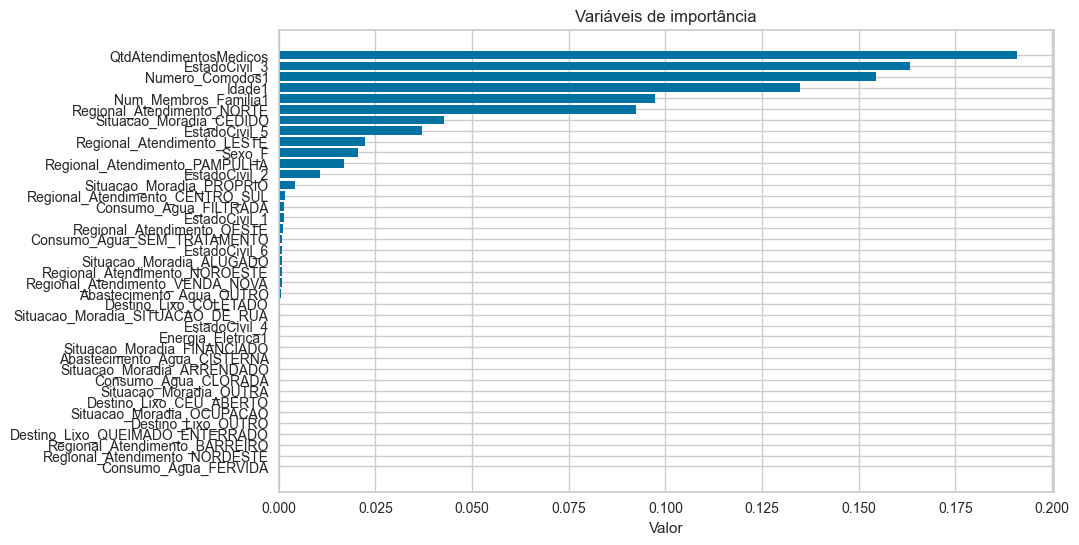

In [50]:
importance_features = modelo_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2.feature_importances_
nomes_features = x_treino_QtdENCAMINHAMENTO_PARA_SAUDE_MENTAL2.columns
importance_df = pd.DataFrame({'Variáveis': nomes_features, 'Importância': importance_features})
importance_df = importance_df.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variáveis'], importance_df['Importância'])
plt.xlabel('Valor')
plt.title('Variáveis de importância')
plt.show()